# CRIME IN NIGERIA

This notebookbook aims to explore crime activity in nigeria by state based on frequency tables from the Nigerian burea of statistics
I gathered data from the Nigerian bureau of statistics on the crime statistics of each state inthe year 2017, thecrime were predivided into several worksheets by a categorical groupin determined by the nigerian police force.i combined these three worksheets into a single csv file while creating another csv file for the totals of the categories

* **OFFENCES AGAINST PERSONS** 
  MURDER, MAN SLAUGHTER,ATTEMPTED MURDER,SUICIDE,ATTEMPTED SUICIDE,GRIEVIOUS HARM WOUNDING,ASSAULT,CHILD STEALING,SLAVE DEALING	RAPE & INDICENT,ASSAULT	KIDNAPPING,UNNATURAL OFFENCE,OTHER OFFENCE.1 

* **OFFENCES AGAINST PROPERTY**													
  ARMED ROBBERY 	 WOUNDING WITH MENACE 	 THEFT /STEALING 	 BURGLARY 	 HOUSE BREAKING 	 STORE BREAKING 	 FALSE PRETENCE & CHEATING/ FRAUD 	 FORGERY 	 RECEIVING STOLEN PROPERTY 	 UNLAWFUL POSSESS 	 ARSON 	 OTHER OFFENCE.2
 
* **OFFENCES AGAINST LAWFUL AUTHORITY**
  FORGERY OF CURRENCY COINING OFFENCE GAMBLING BREACH OF PEACE PERJURY BRIBERY & CORRUPTION 	ESCAPE FROM CUSTODY OTHER OFFENCE.3

 

## Packages used and data loading

In [1]:
import pandas as pd #for data processing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)

In [4]:
crime = pd.read_csv('.../input/CRIMES IN NIGERIA.csv')
totalc = pd.read_csv('.../Users/input/total crime.csv')

## overview of data

In [5]:
print (crime.columns) #showing the reported crimes

Index(['STATE', 'MURDER', 'MAN SLAUGHTER', 'ATTEMPTED MURDER', 'SUICIDE',
       'ATTEMPTED SUICIDE', 'GRIEVIOUS HARM WOUNDING', 'ASSAULT',
       'CHILD STEALING', 'SLAVE DEALING', 'RAPE & INDICENT ASSAULT',
       'KIDNAPPING', 'UNNATURAL OFFENCE', 'OTHER OFFENCE', 'ARMED ROBBERY',
       'WOUNDING WITH MENACE', 'THEFT /STEALING', 'BURGLARY', 'HOUSE BREAKING',
       'STORE BREAKING', 'FALSE PRETENCE & CHEATING/ FRAUD', 'FORGERY',
       'RECEIVING STOLEN PROPERTY', 'UNLAWFUL POSSESS', 'ARSON',
       'OTHER OFFENCE.1', 'FORGERY OF CURRENCY', 'COINING OFFENCE', 'GAMBLING',
       'BREACH OF PEACE', 'PERJURY', 'BRIBERY & CORRUPTION',
       'ESCAPE FROM CUSTODY', 'OTHER OFFENCE.2', 'STATE POPULATION'],
      dtype='object')


In [6]:
print ("crimes: ",crime.shape[0],"states/rows, and ",crime.shape[1],"offences/columns") 

crimes:  39 states/rows, and  35 offences/columns


In [7]:
crime.describe()

,MURDER,MAN SLAUGHTER,ATTEMPTED MURDER,SUICIDE,ATTEMPTED SUICIDE,GRIEVIOUS HARM WOUNDING,ASSAULT,CHILD STEALING,SLAVE DEALING,RAPE & INDICENT ASSAULT,KIDNAPPING,UNNATURAL OFFENCE,OTHER OFFENCE,ARMED ROBBERY,WOUNDING WITH MENACE,THEFT /STEALING,BURGLARY,HOUSE BREAKING,STORE BREAKING,FALSE PRETENCE & CHEATING/ FRAUD,FORGERY,RECEIVING STOLEN PROPERTY,UNLAWFUL POSSESS,ARSON,OTHER OFFENCE.1,FORGERY OF CURRENCY,COINING OFFENCE,GAMBLING,BREACH OF PEACE,PERJURY,BRIBERY & CORRUPTION,ESCAPE FROM CUSTODY,OTHER OFFENCE.2,STATE POPULATION
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,38.000000,3.900000e+01
mean,82.538462,3.076923,19.769231,8.538462,5.025641,286.948718,616.025641,8.846154,2.743590,58.435897,29.076923,29.846154,224.538462,90.435897,13.717949,829.435897,55.564103,82.358974,48.025641,302.025641,20.538462,34.717949,62.948718,27.846154,190.820513,2.846154,1.179487,12.076923,246.282051,1.666667,0.435897,3.153846,58.947368,3.582245e+06
std,48.643627,8.056983,26.985826,19.220119,19.604628,1034.678566,1909.661233,17.921669,7.909747,77.855397,29.472900,55.736003,478.147458,120.381585,43.609480,2025.852592,193.843371,136.457143,88.953118,892.578125,63.744492,63.825399,134.232702,64.416628,368.024804,5.522864,3.068274,41.989588,987.901256,5.778059,1.252258,4.608564,161.518629,1.880306e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,51.500000,0.000000,1.000000,0.000000,0.000000,39.500000,12.500000,0.000000,0.000000,19.500000,8.500000,3.000000,14.000000,36.500000,0.000000,141.500000,0.000000,14.500000,3.000000,32.500000,3.000000,4.000000,8.000000,3.500000,14.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,2.382155e+06
50%,76.000000,0.000000,12.000000,2.000000,0.000000,84.000000,68.000000,0.000000,0.000000,33.000000,15.000000,8.000000,105.000000,52.000000,0.000000,357.000000,9.000000,40.000000,19.000000,114.000000,8.000000,9.000000,22.000000,11.000000,96.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,1.000000,7.500000,3.278873e+06
75%,112.000000,3.500000,21.500000,5.000000,1.000000,160.000000,202.000000,7.000000,0.000000,83.000000,45.000000,25.500000,212.000000,84.000000,5.000000,806.000000,34.000000,82.500000,44.500000,229.000000,14.000000,32.000000,46.000000,19.000000,258.000000,3.000000,0.000000,1.500000,91.500000,1.000000,0.000000,4.500000,32.500000,4.174466e+06
max,216.000000,48.000000,98.000000,105.000000,112.000000,6523.000000,8945.000000,68.000000,41.000000,441.000000,104.000000,269.000000,2931.000000,564.000000,253.000000,12724.000000,1213.000000,668.000000,417.000000,5623.000000,403.000000,288.000000,764.000000,345.000000,2275.000000,23.000000,13.000000,243.000000,6183.000000,35.000000,6.000000,18.000000,712.000000,9.401288e+06


from the above summary it is observe the maximum amount of reported murders in in any state of is 216, the most common reported crime is theft/stealing, fruad and assualt were also high

## missing values and data cleaning
there are no missing values in this dataset,that was managed by the NBS, most of what can be considered cleaning the data set was the conversion from csv from xlsx, and the combining several worksheets into a single worksheet and the seperation of segments of data 

## finding relationships

The goal is to explore the the data and to find relationships between crimes and the state population,there are 35 diffrence columns not be taken on a case by case. It i important to select methods that can be used to streamline the process. by settingup a correlation table in vaables which are strongly correlated with each oher, new insights maybe gathered.

**correlation coefficient(r)** is the degree of relationship between two variables however I am using the**coeffcient of determination(r2)** to take into account multiple regressions.

there are generally corrrelations between in the same grouping set by the nigerian police thus I will only be exploring  highly correlated crimes (>0.7) that do not fall into the same category my cuurrent hypothesis that crime will of all types will inrease with a rise in crime rate thus i will only be following crimes of different categories with high correlation and also on the state population,common crimes like murder and theft

In [8]:
crimecorr = crime.corr()**2
sol = (crimecorr.where(np.triu(np.ones(crimecorr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol.head(400)

GRIEVIOUS HARM WOUNDING           FALSE PRETENCE & CHEATING/ FRAUD    0.981610
                                  FORGERY                             0.972799
BURGLARY                          BREACH OF PEACE                     0.967843
GRIEVIOUS HARM WOUNDING           THEFT /STEALING                     0.966842
THEFT /STEALING                   FALSE PRETENCE & CHEATING/ FRAUD    0.966350
GRIEVIOUS HARM WOUNDING           BURGLARY                            0.961098
                                  BREACH OF PEACE                     0.960935
BURGLARY                          FORGERY                             0.959691
FALSE PRETENCE & CHEATING/ FRAUD  FORGERY                             0.959553
FORGERY                           BREACH OF PEACE                     0.957348
FALSE PRETENCE & CHEATING/ FRAUD  BREACH OF PEACE                     0.948656
BURGLARY                          FALSE PRETENCE & CHEATING/ FRAUD    0.945363
THEFT /STEALING                   BURGLARY          

In [9]:
crimecorr = crime.corr()**2
sola = (crimecorr.where(np.triu(np.ones(crimecorr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=True))
sola.head(150)

MAN SLAUGHTER                     ESCAPE FROM CUSTODY                 0.000021
ATTEMPTED MURDER                  OTHER OFFENCE.2                     0.000026
ATTEMPTED SUICIDE                 RECEIVING STOLEN PROPERTY           0.000042
ATTEMPTED MURDER                  RECEIVING STOLEN PROPERTY           0.000081
ATTEMPTED SUICIDE                 GRIEVIOUS HARM WOUNDING             0.000234
                                  BURGLARY                            0.000313
                                  ARSON                               0.000324
                                  BREACH OF PEACE                     0.000396
ATTEMPTED MURDER                  FORGERY OF CURRENCY                 0.000430
ATTEMPTED SUICIDE                 FORGERY                             0.000452
                                  COINING OFFENCE                     0.000534
SUICIDE                           GAMBLING                            0.000546
MAN SLAUGHTER                     RECEIVING STOLEN P

### choosing pairs to visualise
i am choosing popular common crimes with highrates

murder does not seem to have high  correlation with any variable even manslaughter and attempted murder, population does not seem to have a aprticularly high correlation, also  i am not considering crimes in the same police category 

i am not considering unnatural offences as this is defined as mix of homosexuality and beastiality and anything the arresting officers consider unnatural thus it is too loose a defininition and one of its components is considered a crime in some parts of the world, not considering other offences because it is vague and still in three different categories depending on the nature of the oofence, unnatural offences, suicides and attempted (the numbers are very low and is not generally reported even though it is punishable by law), unlawful possess is vague(it does not specify whether it is drugs of firearms)

|                               |                                    |                              
|---------------                |--------------                      |
|GRIEVIOUS HARM WOUNDING        |  FALSE PRETENCE & CHEATING/ FRAUD  |   
|GRIEVIOUS HARM WOUNDING        |   FORGERY                          | 
|BURGLARY                       |   BREACH OF PEACE                  |  
|GRIEVIOUS HARM WOUNDING        |   THEFT /STEALING                  |  
|THEFT /STEALING                |   BREACH OF PEACE                  |  
|GRIEVIOUS HARM WOUNDING        |   BURGLARY                         |   
|GRIEVIOUS HARM WOUNDING        |   BREACH OF PEACE                  |   
|FORGERY                        |   BREACH OF PEACE                  |   
|FALSE PRETENCE & CHEATING/FRAUD|  BREACH OF PEACE                   |                                  
|FALSE PRETENCE & CHEATING/FRAUD|  PERJURY                           |     
|BURGLARY                       |   PERJURY                          |  
|ASSAULT                        |   HOUSE BREAKING                   |   
|GRIEVIOUS HARM WOUNDING        |    PERJURY                         |                                     
|FORGERY                        |   PERJURY                          |  
|THEFT /STEALING                |   PERJURY                          |   
|ASSAULT                        |   ARSON                            |   
|WOUNDING WITH MENACE           |   GAMBLING                         |   
|RAPE & INDICENT ASSAULT        |   FALSE PRETENCE & CHEATING/ FRAUD |   
|HOUSE BREAKING                 |   ARSON                            |  
|RAPE & INDICENT ASSAULT        |   THEFT /STEALING                  |                                  
|GRIEVIOUS HARM WOUNDING        |   RAPE & INDICENT ASSAULT          |   



In [10]:
totalcorr = totalc.corr()
ola = (totalcorr.where(np.triu(np.ones(totalcorr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False))
ola.head(100)

OFFENCES AGAINST PROPERTY          TOTAL OFFENCES               0.984229
OFFENCES AGAINST LAWFUL AUTHORITY  OFFENCES AGAINST PROPERTY    0.966072
OFFENCES AGAINST PERSONS           TOTAL OFFENCES               0.965403
OFFENCES AGAINST LAWFUL AUTHORITY  TOTAL OFFENCES               0.963275
OFFENCES AGAINST PERSONS           OFFENCES AGAINST PROPERTY    0.906576
OFFENCES AGAINST LAWFUL AUTHORITY  OFFENCES AGAINST PERSONS     0.883726
dtype: float64

Ignoring the correlations involving total offences, since it is just a sum of the other offences, the high correlation between
OFFENCES AGAINST LAWFUL AUTHORITY and OFFENCES AGAINST PROPERTY agrees with the amount of high correlation cases are that are from seperate police categories, with breach of peace and pejury, although there are several instance of pejury, the cases of pejury are far to few to find relationships of note I cannot if people who damage property are more likel to lie under oath than other kinds of offenders,thus i will look look at one instance of it, and focus on breach of peace.

# Data Visualisation

In [11]:
total1 = totalc['OFFENCES AGAINST PROPERTY'].sum()
total2 = totalc['OFFENCES AGAINST LAWFUL AUTHORITY'].sum()
total3 = totalc['OFFENCES AGAINST PERSONS'].sum()
print('OFFENCES AGAINST PROPERTY is',total1)
print('OFFENCES AGAINST LAWFUL AUTHORITY is',total2),
print('OFFENCES AGAINST PERSONS is',total3 )


OFFENCES AGAINST PROPERTY is 68579
OFFENCES AGAINST LAWFUL AUTHORITY is 12678
OFFENCES AGAINST PERSONS is 53641


In [12]:
totald = ({'OFFENCE':['OFFENCESAGAINSTPROPERTY','OFFENCESLAWFULAUTHORITY','OFFENCESPERSONS'],'TOTAL':[total1,total2,total3],})
totaloff = pd.DataFrame(totald)
totaloff.set_index('OFFENCE')



,TOTAL
OFFENCE,
OFFENCESAGAINSTPROPERTY,68579
OFFENCESLAWFULAUTHORITY,12678
OFFENCESPERSONS,53641


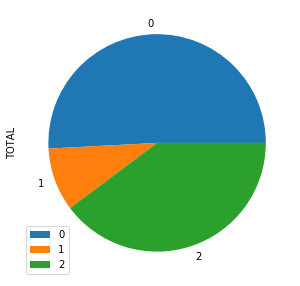

In [13]:
newplot = totaloff.plot.pie(y='TOTAL',figsize=(5,5))

majority of the crimes are offences against property with offences against persons second

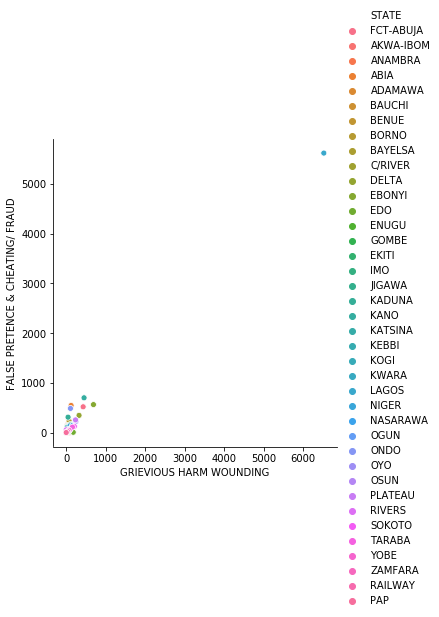

In [14]:
sns.relplot(x='GRIEVIOUS HARM WOUNDING', y='FALSE PRETENCE & CHEATING/ FRAUD', hue='STATE', data=crime)

The data is generally clustered under 1000 for both fraud and grevious harm but Lagos state has such an extremely high crime rate even in comparision to to the other state, the "states" railway and port Aurthority are not states but rather government establishments that operate independently of the states they are located it and have minimal crimes , i will be removing these three rows in the othe visualisation. to better view clusters

### Removing Outliers

In [15]:
#crime.head(40) #used this to check the indexes

In [16]:
crimex= crime.drop([24,37,38], axis=0)
totalcx= totalc.drop([24,37,38],axis=0)

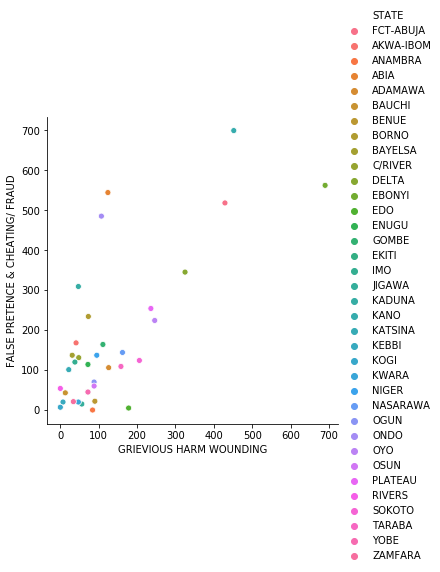

In [17]:
sns.relplot(x='GRIEVIOUS HARM WOUNDING', y='FALSE PRETENCE & CHEATING/ FRAUD', hue='STATE', data=crimex)

after removing the big outliers a majority of the states have fraud and grevious wounding cases under 200, inthe range under 200 there is no particular pattern 

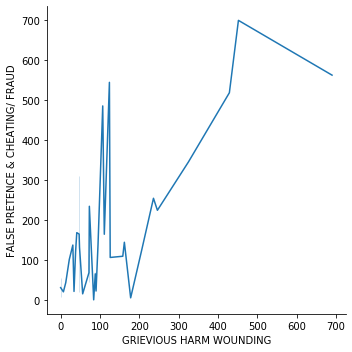

In [18]:
sns.relplot(x='GRIEVIOUS HARM WOUNDING', y='FALSE PRETENCE & CHEATING/ FRAUD', kind='line', data=crimex)

simmilar to the scatter plot beyond  300 grevious harm cases the general trend is upward

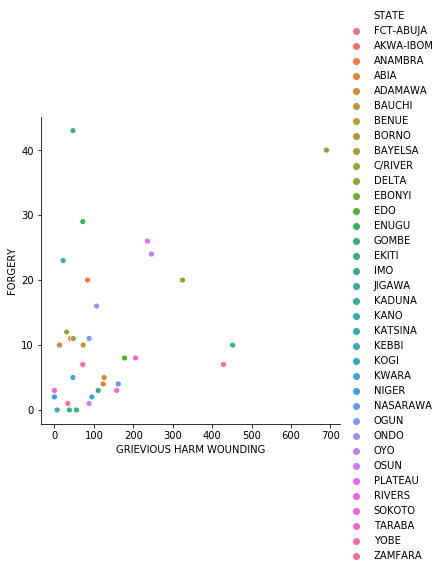

In [19]:
sns.relplot(x='GRIEVIOUS HARM WOUNDING', y='FORGERY', hue='STATE', data=crimex)

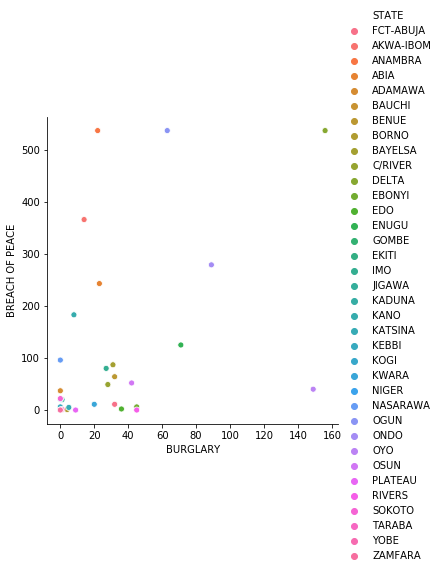

In [20]:
sns.relplot(x='BURGLARY', y='BREACH OF PEACE', hue='STATE', data=crimex)

most states ahve fewer than 40 reported buglary cases, there may be a vague connection but there doesnt seem to be a general 

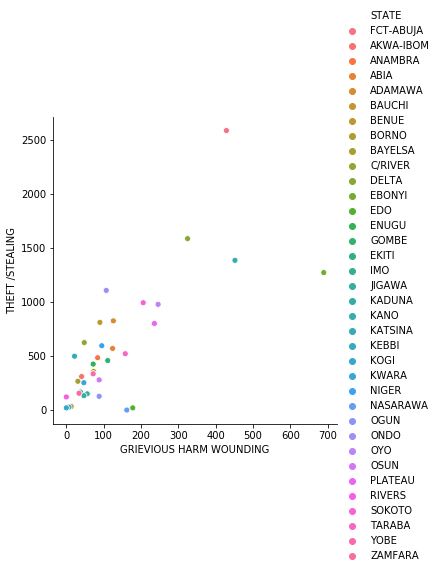

In [21]:
sns.relplot(x='GRIEVIOUS HARM WOUNDING', y='THEFT /STEALING', hue='STATE', data=crimex)

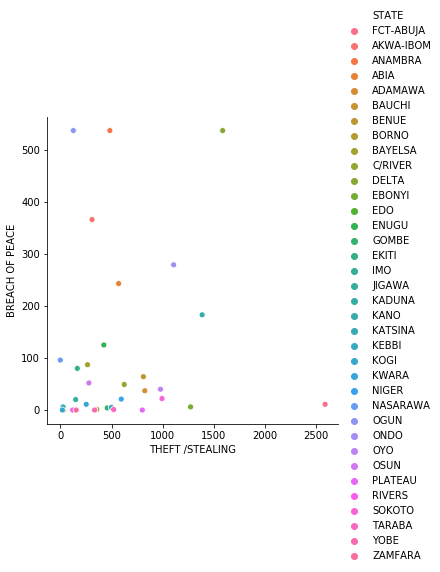

In [22]:
sns.relplot(x='THEFT /STEALING', y='BREACH OF PEACE', hue='STATE', data=crimex)

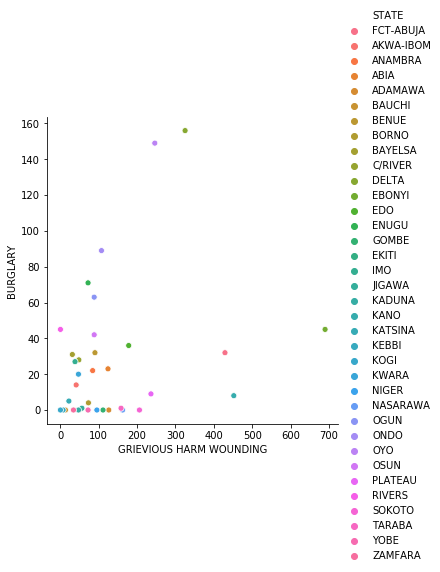

In [23]:
sns.relplot(x='GRIEVIOUS HARM WOUNDING', y='BURGLARY', hue='STATE', data=crimex)

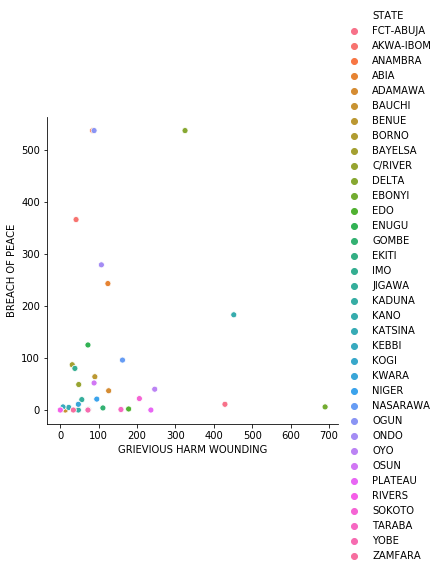

In [24]:
sns.relplot(x='GRIEVIOUS HARM WOUNDING', y='BREACH OF PEACE', hue='STATE', data=crimex)

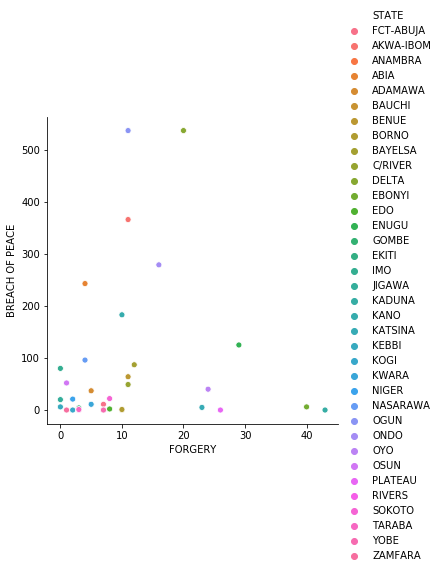

In [25]:
sns.relplot(x='FORGERY', y='BREACH OF PEACE', hue='STATE', data=crimex)

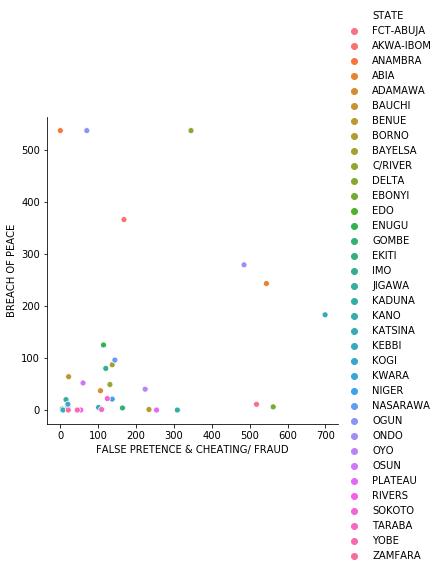

In [26]:
sns.relplot(x='FALSE PRETENCE & CHEATING/ FRAUD', y='BREACH OF PEACE', hue='STATE', data=crimex)

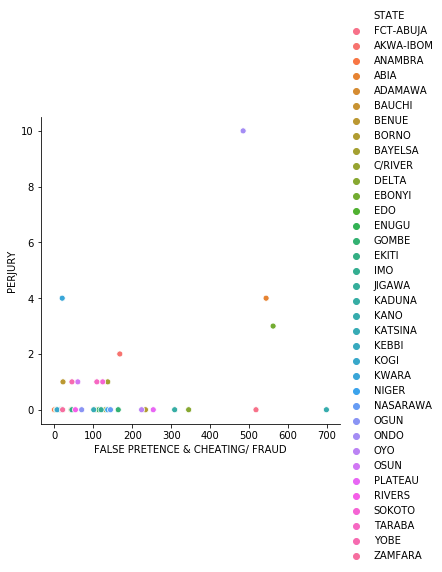

In [27]:
sns.relplot(x='FALSE PRETENCE & CHEATING/ FRAUD', y='PERJURY', hue='STATE', data=crimex)

as earlier stated their are too few instances of pejury reported to comeup with a proper relationship

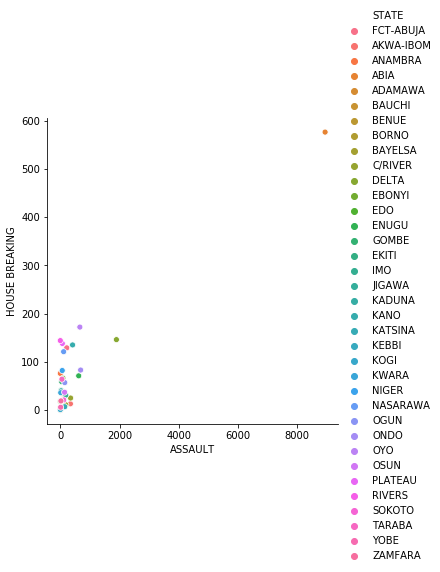

In [28]:
sns.relplot(x='ASSAULT', y='HOUSE BREAKING', hue='STATE', data=crimex)

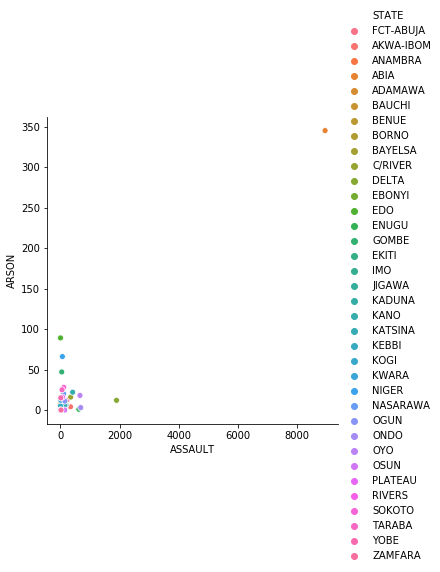

In [29]:
sns.relplot(x='ASSAULT', y='ARSON', hue='STATE', data=crimex)

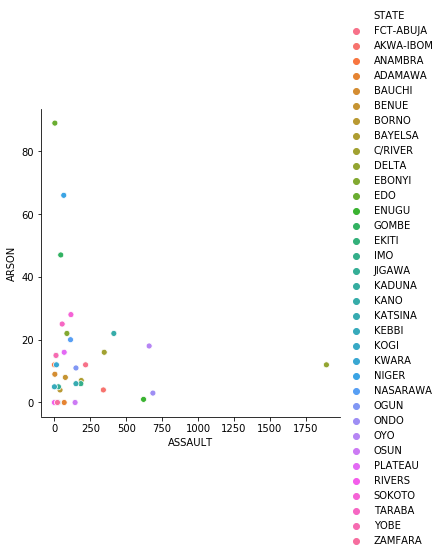

In [30]:
crimea= crimex.drop([3], axis=0)
totalca= totalcx.drop([3],axis=0)
sns.relplot(x='ASSAULT', y='ARSON', hue='STATE', data=crimea)#removing abia to better view what appears to be a cluster

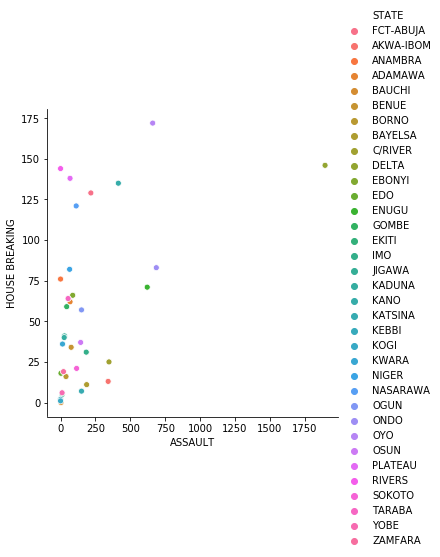

In [31]:
sns.relplot(x='ASSAULT', y='HOUSE BREAKING', hue='STATE', data=crimea)

abia blends with other states most times but they seem to have a particular assualt and arson problem

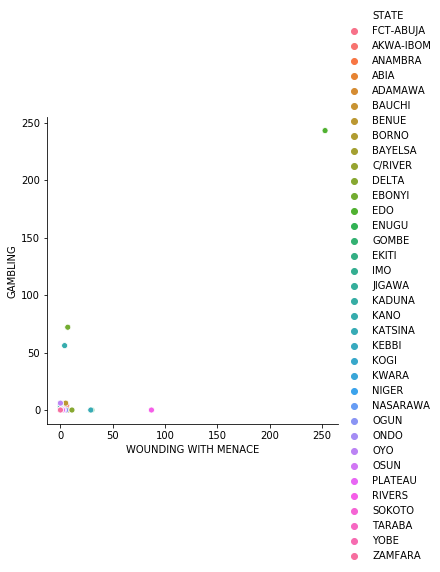

In [32]:
sns.relplot(x='WOUNDING WITH MENACE', y='GAMBLING', hue='STATE', data=crimex)

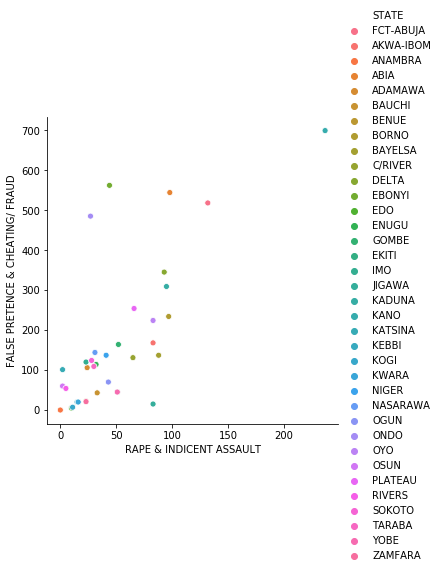

In [33]:
sns.relplot(x='RAPE & INDICENT ASSAULT', y='FALSE PRETENCE & CHEATING/ FRAUD', hue='STATE', data=crimex)

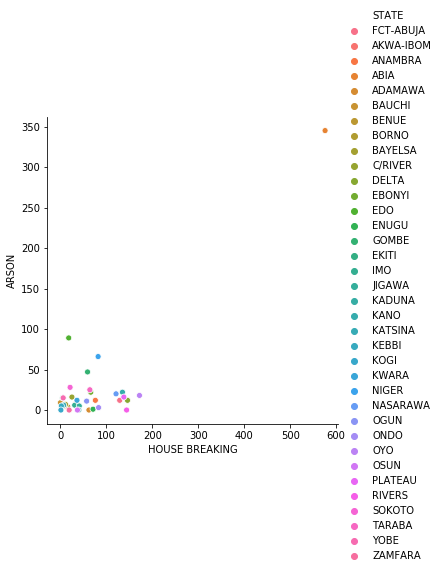

In [34]:
sns.relplot(x='HOUSE BREAKING', y='ARSON', hue='STATE', data=crimex)

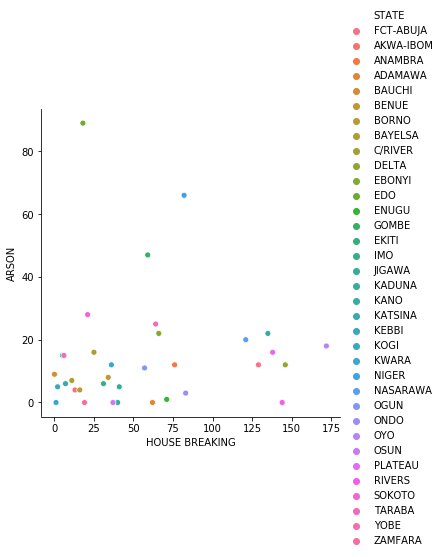

In [35]:
sns.relplot(x='HOUSE BREAKING', y='ARSON', hue='STATE', data=crimea)

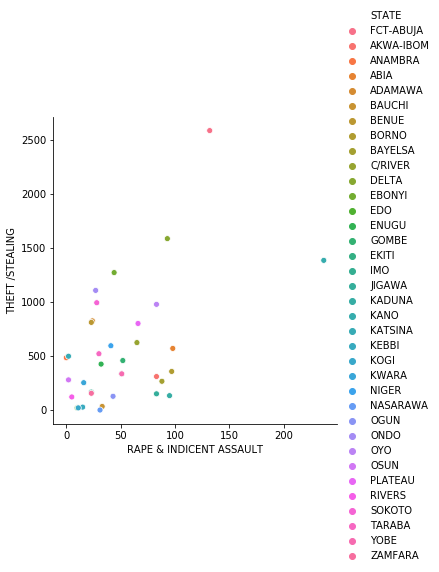

In [36]:
sns.relplot(x='RAPE & INDICENT ASSAULT', y='THEFT /STEALING', hue='STATE', data=crimex)

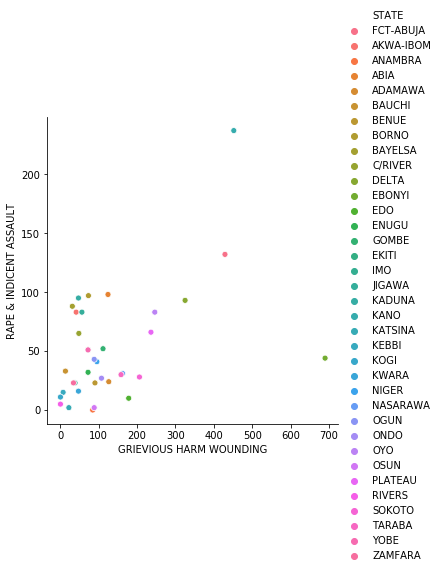

In [37]:
sns.relplot(x='GRIEVIOUS HARM WOUNDING', y='RAPE & INDICENT ASSAULT', hue='STATE', data=crimex)

# looking at population and murder

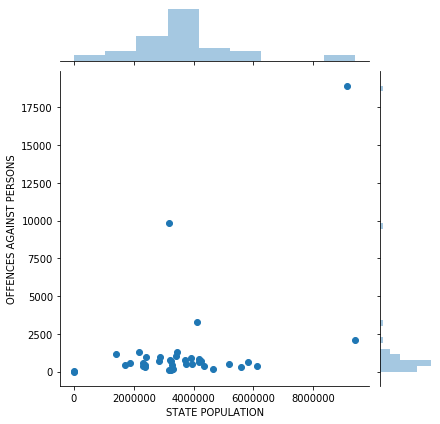

In [38]:
sns.jointplot(x=crime['STATE POPULATION'], y=totalc['OFFENCES AGAINST PERSONS'])

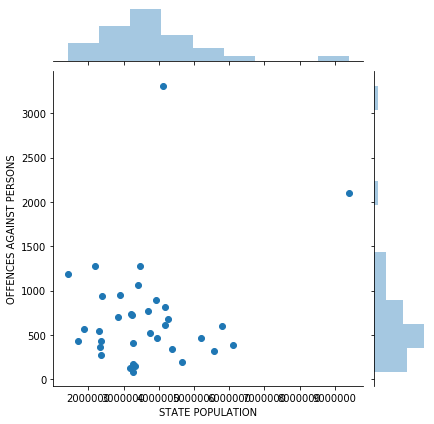

In [39]:
sns.jointplot(x=crimea['STATE POPULATION'], y=totalca['OFFENCES AGAINST PERSONS'])

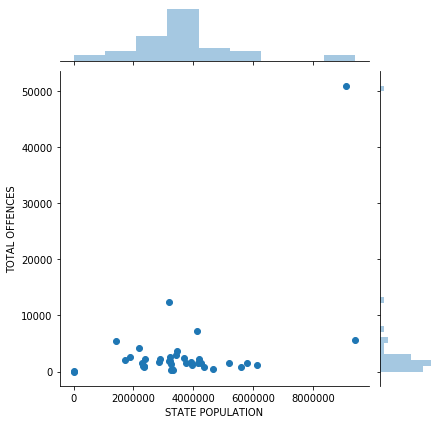

In [40]:
sns.jointplot(x=crime['STATE POPULATION'], y=totalc['TOTAL OFFENCES'])

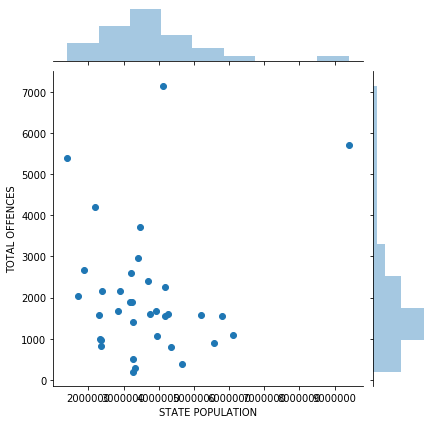

In [41]:
sns.jointplot(x=crimea['STATE POPULATION'], y=totalca['TOTAL OFFENCES'])

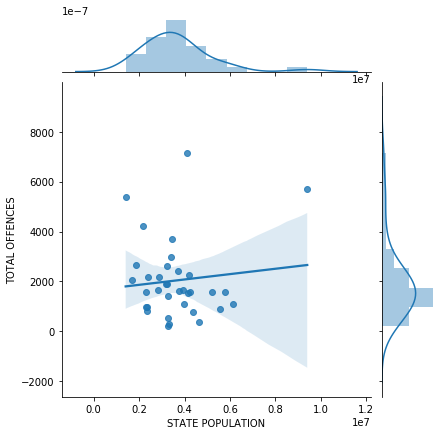

In [42]:
sns.jointplot(x=crimea['STATE POPULATION'], y=totalca['TOTAL OFFENCES'], kind='reg')

in most offences lagos state posseses the overwhelming number of cases, an exception murder although lagos does possess the largest number it does not act like an outlier to distort the data

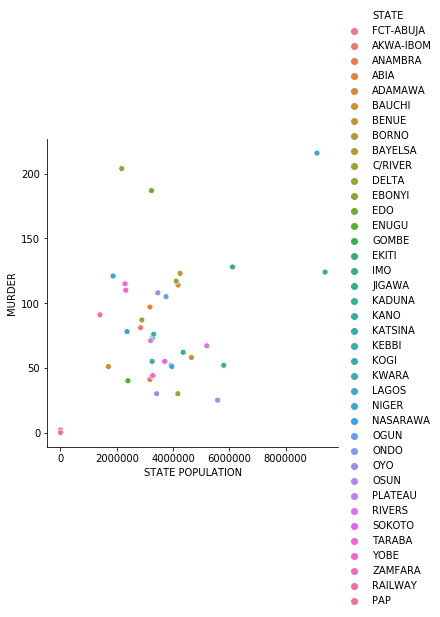

In [43]:
sns.relplot(x='STATE POPULATION', y='MURDER', hue ='STATE', data=crime)

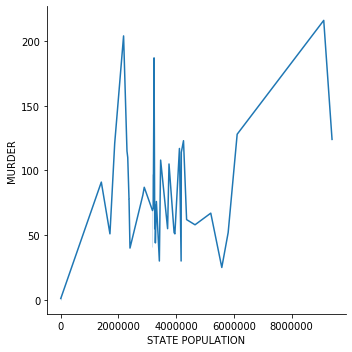

In [44]:
sns.relplot(x='STATE POPULATION', y='MURDER', kind ='line', data=crime)

although there are peaks and lows at different population points, but generraly their is a positive correlation between murder and population

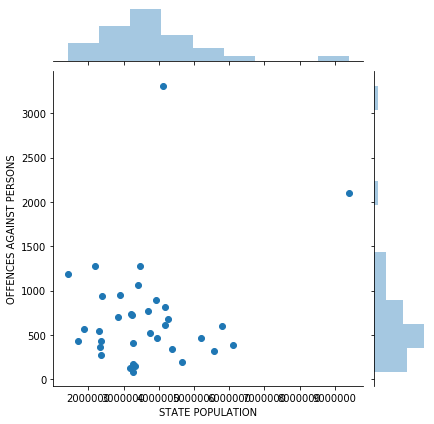

In [45]:
sns.jointplot(x=crimea['STATE POPULATION'], y=totalca['OFFENCES AGAINST PERSONS'])

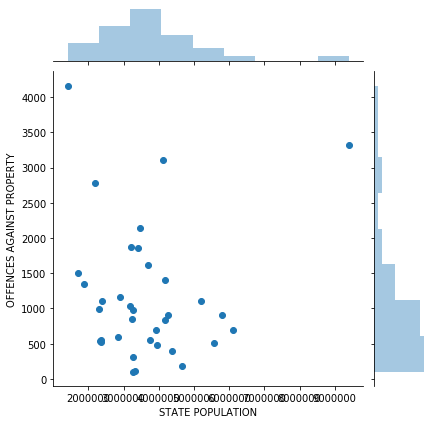

In [46]:
sns.jointplot(x=crimea['STATE POPULATION'], y=totalca['OFFENCES AGAINST PROPERTY'])

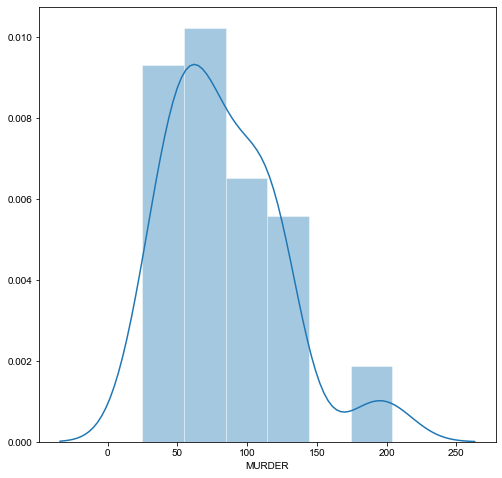

In [47]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(crimex['MURDER'])


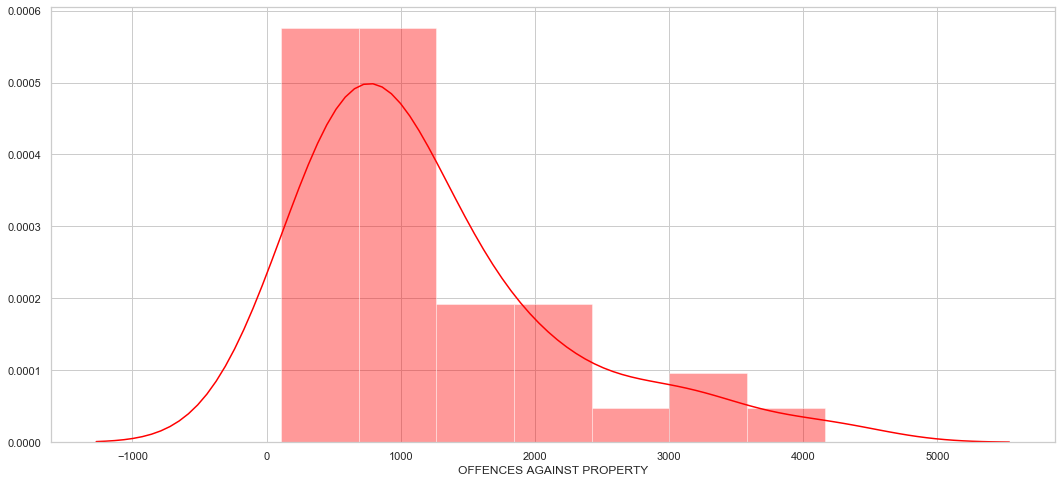

In [48]:
sns.distplot(totalcx['OFFENCES AGAINST PROPERTY'], color = 'red')


In [49]:
print((crime.corr()**2)["MURDER"].sort_values(ascending=False)[1:5])

COINING OFFENCE      0.465417
UNLAWFUL POSSESS     0.358208
GAMBLING             0.344959
UNNATURAL OFFENCE    0.311656
Name: MURDER, dtype: float64


in genral reported criminal activities are under 10,000 with two exceptions namely Lagos and abia state, which appear to have unusually high crime rates.there is a general trend of murders increase in murder with the incerease in population but there are outliers showing that some states have an unsually high murder rate and some with low murder rates to poupulation (at least reported murders)

# Possible improvements
in order to improve the effectiveness of this study..... 

lagos and abia are known economic power houses in nigeria which can explain the high crimeratesin both states, maybe on a later date i will factor in the gross domestic product as an indicator for reported crimerate
it is important to keep in mind the difference between reported crime and actual crime as areas with little police presence may resort to vigilante justice, it is also important to remember that correlation is not causation, a frequency is too little information to study crime patterns. the cases are to be taken individually...
restudying the current plots to gain new insights as my experience increases and adding more effective plotting methods